In [167]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
pd.set_option("max_colwidth", None)
pd.set_option("display.max_columns", None)

In [3]:
data_dictionary = pd.read_csv('data_dictionary.csv')

data_dictionary

,Field,Description
0,VendorID,"A code indicating the LPEP provider that provided the record (1= Creative Mobile Technologies, LLC; 2= Verifone Inc.)"
1,lpep_pickup_datetime,The date and time when the meter was engaged
2,lpep_dropoff_datetime,The date and time when the meter was disengaged
3,store_and_fwd_flag,"This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka �store and forward,� because the vehicle did not have a connection to the server (Y= store and forward trip; N= not a store and forward trip)"
4,RatecodeID,The final rate code in effect at the end of the trip (1= Standard rate; 2= JFK; 3= Newark; 4= Nassau or Westchester; 5= Negotiated fare; 6= Group ride)
5,PULocationID,TLC Taxi Zone in which the taximeter was engaged
6,DOLocationID,TLC Taxi Zone in which the taximeter was disengaged
7,passenger_count,The number of passengers in the vehicle (this is a driver entered value)
8,trip_distance,The elapsed trip distance in miles reported by the taximeter
9,fare_amount,The time-and-distance fare calculated by the meter


In [4]:
taxi_zones = pd.read_csv('taxi_zones.csv')

taxi_zones

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


In [5]:
calendar = pd.read_csv('454_calendar.csv')

calendar

,Date,FiscalYear,FiscalQuarter,FiscalMonthNumber,FiscalMonthOfQuarter,FiscalWeekOfYear,DayOfWeek,FiscalMonthName,FiscalMonthYear,FiscalQuarterYear,DayOfMonthNumber,DayName
0,2017-02-05,2017,1,1,1,1,0,February,17-Feb,12017,5,Sunday
1,2017-02-06,2017,1,1,1,1,1,February,17-Feb,12017,6,Monday
2,2017-02-07,2017,1,1,1,1,2,February,17-Feb,12017,7,Tuesday
3,2017-02-08,2017,1,1,1,1,3,February,17-Feb,12017,8,Wednesday
4,2017-02-09,2017,1,1,1,1,4,February,17-Feb,12017,9,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...
1451,2021-01-26,2020,4,12,3,52,2,January,20-Jan,42020,26,Tuesday
1452,2021-01-27,2020,4,12,3,52,3,January,20-Jan,42020,27,Wednesday
1453,2021-01-28,2020,4,12,3,52,4,January,20-Jan,42020,28,Thursday
1454,2021-01-29,2020,4,12,3,52,5,January,20-Jan,42020,29,Friday


In [6]:
taxi_trips_2017 = pd.read_csv('taxi_trips/2017_taxi_trips.csv')
taxi_trips_2018 = pd.read_csv('taxi_trips/2018_taxi_trips.csv')
taxi_trips_2019 = pd.read_csv('taxi_trips/2019_taxi_trips.csv')
taxi_trips_2020 = pd.read_csv('taxi_trips/2020_taxi_trips.csv')

print(taxi_trips_2017.shape)
print(taxi_trips_2018.shape)
print(taxi_trips_2019.shape)
print(taxi_trips_2020.shape)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(11740667, 18)
(8807303, 18)
(6044050, 19)
(1734051, 19)


In [7]:
taxi_trips_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11740667 entries, 0 to 11740666
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   lpep_pickup_datetime   object 
 2   lpep_dropoff_datetime  object 
 3   store_and_fwd_flag     object 
 4   RatecodeID             int64  
 5   PULocationID           int64  
 6   DOLocationID           int64  
 7   passenger_count        int64  
 8   trip_distance          float64
 9   fare_amount            float64
 10  extra                  float64
 11  mta_tax                float64
 12  tip_amount             float64
 13  tolls_amount           float64
 14  improvement_surcharge  float64
 15  total_amount           float64
 16  payment_type           int64  
 17  trip_type              float64
dtypes: float64(9), int64(6), object(3)
memory usage: 1.6+ GB


In [8]:
taxi_trips_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807303 entries, 0 to 8807302
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   lpep_pickup_datetime   object 
 2   lpep_dropoff_datetime  object 
 3   store_and_fwd_flag     object 
 4   RatecodeID             int64  
 5   PULocationID           int64  
 6   DOLocationID           int64  
 7   passenger_count        int64  
 8   trip_distance          float64
 9   fare_amount            float64
 10  extra                  float64
 11  mta_tax                float64
 12  tip_amount             float64
 13  tolls_amount           float64
 14  improvement_surcharge  float64
 15  total_amount           float64
 16  payment_type           int64  
 17  trip_type              float64
dtypes: float64(9), int64(6), object(3)
memory usage: 1.2+ GB


In [9]:
taxi_trips_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6044050 entries, 0 to 6044049
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   lpep_pickup_datetime   object 
 2   lpep_dropoff_datetime  object 
 3   store_and_fwd_flag     object 
 4   RatecodeID             float64
 5   PULocationID           int64  
 6   DOLocationID           int64  
 7   passenger_count        float64
 8   trip_distance          float64
 9   fare_amount            float64
 10  extra                  float64
 11  mta_tax                float64
 12  tip_amount             float64
 13  tolls_amount           float64
 14  improvement_surcharge  float64
 15  total_amount           float64
 16  payment_type           float64
 17  trip_type              float64
 18  congestion_surcharge   float64
dtypes: float64(14), int64(2), object(3)
memory usage: 876.1+ MB


In [10]:
taxi_trips_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734051 entries, 0 to 1734050
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   lpep_pickup_datetime   object 
 2   lpep_dropoff_datetime  object 
 3   store_and_fwd_flag     object 
 4   RatecodeID             float64
 5   PULocationID           int64  
 6   DOLocationID           int64  
 7   passenger_count        float64
 8   trip_distance          float64
 9   fare_amount            float64
 10  extra                  float64
 11  mta_tax                float64
 12  tip_amount             float64
 13  tolls_amount           float64
 14  improvement_surcharge  float64
 15  total_amount           float64
 16  payment_type           float64
 17  trip_type              float64
 18  congestion_surcharge   float64
dtypes: float64(14), int64(2), object(3)
memory usage: 251.4+ MB


In [11]:
taxi_trips_2019['congestion_surcharge'].value_counts()

 0.00    4346092
 2.75     732668
 2.50       4651
 0.75         73
-2.75         72
 2.00          2
-2.50          1
-0.75          1
 0.30          1
Name: congestion_surcharge, dtype: int64

In [12]:
taxi_trips_2020['congestion_surcharge'].value_counts()

 0.00    993526
 2.75    211706
 2.50       709
-2.75        11
 0.75         7
Name: congestion_surcharge, dtype: int64

In [13]:
# congestion_surcharge is missing from taxi_trips_2017 and taxi_trips_2018. Adding the column to make all dataframes same width before concatenating the dataframes
taxi_trips_2017['congestion_surcharge'] = 0.0
taxi_trips_2018['congestion_surcharge'] = 0.0

print(taxi_trips_2017.shape)
print(taxi_trips_2018.shape)

(11740667, 19)
(8807303, 19)


In [14]:
# Concating all taxi trips
taxi_trips = pd.concat([taxi_trips_2017, taxi_trips_2018, taxi_trips_2019, taxi_trips_2020]).reset_index(drop = True)

taxi_trips.shape

(28326071, 19)

In [15]:
# Verifying the number of rows
print("Total rows in concatenated dataframe: {}".format(taxi_trips.shape[0]))
print("Rows in each dataframe added up: {}".format(taxi_trips_2017.shape[0] + taxi_trips_2018.shape[0] + taxi_trips_2019.shape[0] + taxi_trips_2020.shape[0]))

Total rows in concatenated dataframe: 28326071
Rows in each dataframe added up: 28326071


In [16]:
taxi_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28326071 entries, 0 to 28326070
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   lpep_pickup_datetime   object 
 2   lpep_dropoff_datetime  object 
 3   store_and_fwd_flag     object 
 4   RatecodeID             float64
 5   PULocationID           int64  
 6   DOLocationID           int64  
 7   passenger_count        float64
 8   trip_distance          float64
 9   fare_amount            float64
 10  extra                  float64
 11  mta_tax                float64
 12  tip_amount             float64
 13  tolls_amount           float64
 14  improvement_surcharge  float64
 15  total_amount           float64
 16  payment_type           float64
 17  trip_type              float64
 18  congestion_surcharge   float64
dtypes: float64(14), int64(2), object(3)
memory usage: 4.0+ GB


## Data Types

<div class="alert alert-block alert-info">
    <h4>Data Types Inferred from Data Dictionary</h4><br>
    <b>VendorID:</b> Integer<br>
    <b>lpep_pickup_datetime:</b> DateTime - Done<br>
    <b>lpep_dropoff_datetime:</b> DateTime - Done<br>
    <b>store_and_fwd_flag:</b> String - Correct<br>
    <b>RatecodeID:</b> Integer<br>
    <b>PULocationID:</b> Integer - Correct<br>
    <b>DOLocationID:</b> Integer - Correct<br>
    <b>passenger_count:</b> Integer<br>
    <b>trip_distance:</b> Float - Correct<br>
    <b>fare_amount:</b> Float - Correct<br>
    <b>extra:</b> Float - Correct<br>
    <b>mta_tax:</b> Float - Correct<br>
    <b>tip_amount:</b> Float - Correct<br>
    <b>tolls_amount:</b> Float - Correct<br>
    <b>improvement_surcharge:</b> Float - Correct<br>
    <b>total_amount:</b> Float - Correct<br>
    <b>payment_type:</b> Integer<br>
    <b>trip_type:</b> Integer<br>
    <b>congestion_surcharge:</b> Float - Correct<br>
</div>

###### Converting String to DateTime format

In [17]:
taxi_trips['lpep_pickup_datetime'] = pd.to_datetime(taxi_trips['lpep_pickup_datetime'])
taxi_trips['lpep_dropoff_datetime'] = pd.to_datetime(taxi_trips['lpep_dropoff_datetime'])

print(taxi_trips['lpep_pickup_datetime'].dtype)
print(taxi_trips['lpep_dropoff_datetime'].dtype)

datetime64[ns]
datetime64[ns]


<div class="alert alert-block alert-info">
    <h4>Data Types Inferred from Data Dictionary</h4><br>
    <b>VendorID:</b> Integer<br>
    <b>RatecodeID:</b> Integer<br>
    <b>passenger_count:</b> Integer<br>
    <b>payment_type:</b> Integer<br>
    <b>trip_type:</b> Integer<br>
</div>

###### Converting Float to Integer

In [18]:
# Checking values in columns to see if it matches data dictionary
print(taxi_trips['VendorID'].value_counts())
print(taxi_trips['RatecodeID'].value_counts())
print(taxi_trips['passenger_count'].value_counts())
print(taxi_trips['payment_type'].value_counts())
print(taxi_trips['trip_type'].value_counts())

2.0    22569744
1.0     4814128
Name: VendorID, dtype: int64
1.0     26555346
5.0       740222
2.0        55534
4.0        18498
3.0        13769
6.0          349
99.0         154
Name: RatecodeID, dtype: int64
1.0    23244224
2.0     2117741
5.0      909801
6.0      468953
3.0      455954
4.0      156794
0.0       29101
8.0         596
7.0         538
9.0         170
Name: passenger_count, dtype: int64
1.0    14793538
2.0    12392982
3.0      132220
4.0       63966
5.0        1166
Name: payment_type, dtype: int64
1.0    26640078
2.0      743340
Name: trip_type, dtype: int64


In [19]:
taxi_trips['VendorID'] = taxi_trips['VendorID'].fillna(0.0).astype(int)
taxi_trips['RatecodeID'] = taxi_trips['RatecodeID'].fillna(0.0).astype(int)
taxi_trips['passenger_count'] = taxi_trips['passenger_count'].fillna(0.0).astype(int)
taxi_trips['payment_type'] = taxi_trips['payment_type'].fillna(0.0).astype(int)
taxi_trips['trip_type'] = taxi_trips['trip_type'].fillna(0.0).astype(int)

## Column Values

In [77]:
taxi_trips.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28326071 entries, 0 to 28326070
Data columns (total 27 columns):
 #   Column                 Non-Null Count     Dtype         
---  ------                 --------------     -----         
 0   VendorID               28326071 non-null  int32         
 1   lpep_pickup_datetime   28326071 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  28326071 non-null  datetime64[ns]
 3   store_and_fwd_flag     27383872 non-null  object        
 4   RatecodeID             28326071 non-null  int32         
 5   PULocationID           28326071 non-null  int64         
 6   DOLocationID           28326071 non-null  int64         
 7   passenger_count        28326071 non-null  int32         
 8   trip_distance          28326071 non-null  float64       
 9   fare_amount            28326071 non-null  float64       
 10  extra                  28326071 non-null  float64       
 11  mta_tax                28326071 non-null  float64       
 12  tip_amount  

### VendorID

A code indicating the LPEP provider that provided the record (1= Creative Mobile Technologies, LLC; 2= Verifone Inc.)

In [20]:
# Checking values in VendorID
taxi_trips['VendorID'].value_counts()

2    22569744
1     4814128
0      942199
Name: VendorID, dtype: int64

There are 942199 records where the VendorID is missing

In [86]:
taxi_trips['Vendor'] = taxi_trips['VendorID'].map({1 : 'Creative Mobile Technologies, LLC', 2 : 'Verifone Inc.', 0 : 'Unknown'})

taxi_trips['Vendor'].value_counts()

Verifone Inc.                        22569744
Creative Mobile Technologies, LLC     4814128
Unknown                                942199
Name: Vendor, dtype: int64

### lpep_pickup_datetime

The date and time when the meter was engaged

### lpep_dropoff_datetime

The date and time when the meter was disengaged

### store_and_fwd_flag

This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server (Y= store and forward trip; N= not a store and forward trip)

In [23]:
# Checking values in VendorID
taxi_trips['store_and_fwd_flag'].value_counts()

N    27330950
Y       52922
Name: store_and_fwd_flag, dtype: int64

In [24]:
# Checking values in VendorID
print(taxi_trips['store_and_fwd_flag'].unique())

['N' 'Y' nan]


In [25]:
# How many null values are there in store_and_fwd_flag?
print("There are {} null values in store_and_fwd_flag".format(taxi_trips['store_and_fwd_flag'].isnull().sum()))

There are 942199 null values in store_and_fwd_flag


### RatecodeID

The final rate code in effect at the end of the trip (1= Standard rate; 2= JFK; 3= Newark; 4= Nassau or Westchester; 5= Negotiated fare; 6= Group ride)

In [26]:
# Checking values in VendorID
taxi_trips['RatecodeID'].value_counts()

1     26555346
0       942199
5       740222
2        55534
4        18498
3        13769
6          349
99         154
Name: RatecodeID, dtype: int64

In [27]:
# Checking values in VendorID
print(taxi_trips['RatecodeID'].unique())

[ 1  2  4  3  6 99  5  0]


In [28]:
rate_codes = {1 : 'Standard rate', 2 : 'JFK', 3 : 'Newark', 4 : 'Nassau or Westchester', 5 : 'Negotiated fare', 6 : 'Group ride', 0 : 'Unknown', 99 : 'Unknown'}

taxi_trips['Ratecode'] = taxi_trips['RatecodeID'].map(rate_codes)

taxi_trips['Ratecode'].value_counts()

Standard rate            26555346
Unknown                    942353
Negotiated fare            740222
JFK                         55534
Nassau or Westchester       18498
Newark                      13769
Group ride                    349
Name: Ratecode, dtype: int64

In [29]:
# How many null values are there in Ratecode?
print("There are {} unknowns in Ratecode".format(taxi_trips.loc[taxi_trips['Ratecode']=='Unknown'].shape[0]))

There are 942353 unknowns in Ratecode


### PULocationID

TLC Taxi Zone in which the taximeter was engaged

In [30]:
# Checking values in VendorID
taxi_trips['PULocationID'].value_counts()

74     1894141
75     1629516
41     1587500
7      1300642
82     1208719
        ...   
204         40
12          33
99          19
199         15
105          1
Name: PULocationID, Length: 262, dtype: int64

In [31]:
# How many null values are there in PULocationID?
print("There are {} null values in PULocationID".format(taxi_trips['PULocationID'].isnull().sum()))

There are 0 null values in PULocationID


In [32]:
taxi_trips['PULocationID'].min()

1

In [33]:
# Checking if there are any duplicate rows before merging. No duplicate rows if False
taxi_zones['LocationID'].duplicated().any()

False

In [34]:
# Merge PULocationID with taxi_zones
taxi_trips = taxi_trips.merge(right=taxi_zones, how='left', left_on='PULocationID', right_on='LocationID')

In [35]:
# Dropping LocationID from taxi_trips
taxi_trips.drop(columns='LocationID', inplace=True)

In [36]:
# Renaming merged columns
taxi_trips.rename(columns={'Borough' : 'PU_Borough', 'Zone' : 'PU_Zone', 'service_zone' : 'PU_service_zone'}, inplace=True)

### DOLocationID

TLC Taxi Zone in which the taximeter was disengaged

In [37]:
taxi_trips['DOLocationID'].value_counts()

74     996733
42     963534
41     858422
7      817099
129    751496
        ...  
2         165
99         45
199        13
105         8
110         1
Name: DOLocationID, Length: 263, dtype: int64

In [38]:
# How many null values are there in DOLocationID?
print("There are {} null values in DOLocationID".format(taxi_trips['DOLocationID'].isnull().sum()))

There are 0 null values in DOLocationID


In [39]:
taxi_trips['DOLocationID'].min()

1

In [40]:
# Merge DOLocationID with taxi_zones
taxi_trips = taxi_trips.merge(right=taxi_zones, how='left', left_on='DOLocationID', right_on='LocationID')

In [41]:
# Dropping LocationID from taxi_trips
taxi_trips.drop(columns='LocationID', inplace=True)

In [42]:
# Renaming merged columns
taxi_trips.rename(columns={'Borough' : 'DO_Borough', 'Zone' : 'DO_Zone', 'service_zone' : 'DO_service_zone'}, inplace=True)

### passenger_count

The number of passengers in the vehicle (this is a driver entered value)

In [43]:
taxi_trips['passenger_count'].value_counts()

1    23244224
2     2117741
0      971300
5      909801
6      468953
3      455954
4      156794
8         596
7         538
9         170
Name: passenger_count, dtype: int64

In [44]:
# Printing the number of missing passenger_count
print("There are {} records with missing passenger_count. This is a driver entered value".format(taxi_trips.loc[taxi_trips['passenger_count']==0].shape[0]))

There are 971300 records with missing passenger_count. This is a driver entered value


### trip_distance

The elapsed trip distance in miles reported by the taximeter

In [45]:
taxi_trips['trip_distance'].value_counts()

 0.00     438914
 0.90     295293
 1.00     292823
 0.80     289703
 1.10     276241
           ...  
-23.85         1
 52.57         1
 65.32         1
 74.03         1
 36.83         1
Name: trip_distance, Length: 8314, dtype: int64

In [46]:
taxi_trips['trip_distance'].describe()

count    2.832607e+07
mean     3.866140e+00
std      2.969125e+02
min     -2.032908e+04
25%      1.030000e+00
50%      1.860000e+00
75%      3.660000e+00
max      2.056541e+05
Name: trip_distance, dtype: float64

###### Minimum value of trip_distance is in the negative. Let's investigate the negatives

In [47]:
# How many rows are there where the trip_distance is in the negative?
print('There are {} records where the trip_distance is in the negative'.format(taxi_trips.loc[taxi_trips['trip_distance']<0].shape[0]))

There are 19487 records where the trip_distance is in the negative


In [48]:
# Checking the first 10 rows where the trip_distance is in the negative.
taxi_trips.loc[taxi_trips['trip_distance']<0].head(10)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Vendor,Ratecode,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone
21880092,2,2019-11-20 16:02:33,2019-11-20 16:23:41,N,5,197,124,1,-4.46,14.96,0.0,0.5,0.0,0.0,0.3,15.76,2,1,0.0,Verifone Inc.,Negotiated fare,Queens,Richmond Hill,Boro Zone,Queens,Howard Beach,Boro Zone
21880097,2,2019-11-21 17:39:56,2019-11-21 18:07:10,N,5,65,225,1,-3.87,23.51,0.0,0.5,0.0,0.0,0.3,24.31,2,1,0.0,Verifone Inc.,Negotiated fare,Brooklyn,Downtown Brooklyn/MetroTech,Boro Zone,Brooklyn,Stuyvesant Heights,Boro Zone
21880102,2,2019-11-23 08:25:54,2019-11-23 08:41:05,N,5,92,9,1,-5.28,18.95,0.0,0.5,0.0,0.0,0.3,19.75,2,1,0.0,Verifone Inc.,Negotiated fare,Queens,Flushing,Boro Zone,Queens,Auburndale,Boro Zone
21880105,2,2019-11-24 08:17:53,2019-11-24 08:41:19,N,5,188,225,1,-4.33,13.92,0.0,0.5,0.0,0.0,0.3,14.72,2,1,0.0,Verifone Inc.,Negotiated fare,Brooklyn,Prospect-Lefferts Gardens,Boro Zone,Brooklyn,Stuyvesant Heights,Boro Zone
21880109,2,2019-11-25 08:27:44,2019-11-25 08:43:54,N,5,177,35,1,-1.43,18.92,0.0,0.5,0.0,0.0,0.3,19.72,2,1,0.0,Verifone Inc.,Negotiated fare,Brooklyn,Ocean Hill,Boro Zone,Brooklyn,Brownsville,Boro Zone
21880110,2,2019-11-25 09:46:59,2019-11-25 10:55:47,N,5,35,48,1,-12.95,40.10,0.0,0.5,0.0,0.0,0.3,40.90,2,1,0.0,Verifone Inc.,Negotiated fare,Brooklyn,Brownsville,Boro Zone,Manhattan,Clinton East,Yellow Zone
21880113,2,2019-11-25 12:31:15,2019-11-25 14:13:59,N,5,217,48,1,-3.46,12.35,0.0,0.5,0.0,0.0,0.3,13.15,2,1,0.0,Verifone Inc.,Negotiated fare,Brooklyn,South Williamsburg,Boro Zone,Manhattan,Clinton East,Yellow Zone
21880114,2,2019-11-25 12:08:28,2019-11-25 14:51:40,N,5,91,108,1,-1.80,7.20,0.0,0.5,0.0,0.0,0.3,8.00,2,1,0.0,Verifone Inc.,Negotiated fare,Brooklyn,Flatlands,Boro Zone,Brooklyn,Gravesend,Boro Zone
21880115,2,2019-11-25 19:09:26,2019-11-25 19:57:56,N,5,33,76,1,-7.55,21.09,0.0,0.5,0.0,0.0,0.3,21.89,2,1,0.0,Verifone Inc.,Negotiated fare,Brooklyn,Brooklyn Heights,Boro Zone,Brooklyn,East New York,Boro Zone
21880175,2,2019-12-08 13:40:04,2019-12-08 14:01:43,N,5,124,76,1,-3.93,9.00,0.0,0.5,0.0,0.0,0.3,9.80,2,1,0.0,Verifone Inc.,Negotiated fare,Queens,Howard Beach,Boro Zone,Brooklyn,East New York,Boro Zone


These are valid records and looks like the minus is displayed in error

In [49]:
# Sum of trip_distance as it is
sum_trip_distance = taxi_trips['trip_distance'].sum()

# Sum of positive values in trip_distance
sum_trip_distance_positive = taxi_trips.loc[taxi_trips['trip_distance']>0,'trip_distance'].sum()

# Sum of negative values in trip_distance
sum_trip_distance_negative = taxi_trips.loc[taxi_trips['trip_distance']<0,'trip_distance'].sum()

# Expected sum of trip_distance when the negative values are converted to positive values
sum_trip_distance_exp_converted = taxi_trips.loc[taxi_trips['trip_distance']>0,'trip_distance'].sum() + taxi_trips.loc[taxi_trips['trip_distance']<0,'trip_distance'].abs().sum()

print('Sum of trip_distance: {:.2f}'.format(sum_trip_distance))
print('Sum of positive values in trip_distance: {:.2f}'.format(sum_trip_distance_positive))
print('Sum of negative values in trip_distance: {:.2f}'.format(sum_trip_distance_negative))
print('Expected sum after converting negative values to positive: {:.2f}'.format(sum_trip_distance_exp_converted))

Sum of trip_distance: 109512570.19
Sum of positive values in trip_distance: 109715069.74
Sum of negative values in trip_distance: -202499.55
Expected sum after converting negative values to positive: 109917569.29


In [50]:
# Reassigning the column with it's absolute value
taxi_trips['trip_distance'] = taxi_trips['trip_distance'].abs()

# Checking if the sum matches with the expected sum in the previous step
print('Actual sum of trip_distance after converting negative values to positive: {:.2f}'.format(taxi_trips['trip_distance'].sum()))

Actual sum of trip_distance after converting negative values to positive: 109917569.29


In [51]:
taxi_trips['trip_distance'].describe()

count    2.832607e+07
mean     3.880438e+00
std      2.969123e+02
min      0.000000e+00
25%      1.030000e+00
50%      1.870000e+00
75%      3.660000e+00
max      2.056541e+05
Name: trip_distance, dtype: float64

###### Minimum value of trip_distance is now zero. Why are there zeros?

In [52]:
# How many rows are there where the trip_distance is zero?
print('There are {} records where the trip_distance is zero'.format(taxi_trips.loc[taxi_trips['trip_distance']==0].shape[0]))

There are 438914 records where the trip_distance is zero


Possible explanation of zero trip_distance:
 - Ride was less than 0.1 miles. This can be identified if the minimum fare is provided
 - Driver forgot to engage the meter. To populate the trip_distance where the meter wasn't engaged, the formula for the fare_amount is needed

### fare_amount

The time-and-distance fare calculated by the meter

In [54]:
taxi_trips['fare_amount'].describe()

count    2.832607e+07
mean     1.318245e+01
std      1.187243e+01
min     -8.900000e+02
25%      6.500000e+00
50%      9.500000e+00
75%      1.600000e+01
max      1.044584e+04
Name: fare_amount, dtype: float64

In [55]:
# Reassigning the column with it's absolute value
taxi_trips['fare_amount'] = taxi_trips['fare_amount'].abs()

In [56]:
taxi_trips['fare_amount'].describe()

count    2.832607e+07
mean     1.321725e+01
std      1.183367e+01
min      0.000000e+00
25%      6.500000e+00
50%      9.500000e+00
75%      1.600000e+01
max      1.044584e+04
Name: fare_amount, dtype: float64

In [57]:
# How many rows are there where the fare_amount is zero?
fare_amount_zero = taxi_trips.loc[taxi_trips['fare_amount']==0].shape[0]

print('There are {} records where the fare_amount is zero'.format(fare_amount_zero))

There are 59225 records where the fare_amount is zero


### extra

Miscellaneous extras and surcharges (this only includes the 0.50 and 1.00 rush hour and overnight charges)

In [58]:
taxi_trips['extra'].describe()

count    2.832607e+07
mean     3.957281e-01
std      5.724350e-01
min     -2.542000e+01
25%      0.000000e+00
50%      0.000000e+00
75%      5.000000e-01
max      3.000000e+01
Name: extra, dtype: float64

In [59]:
# Reassigning the column with it's absolute value
taxi_trips['extra'] = taxi_trips['extra'].abs()

In [88]:
taxi_trips['extra'].value_counts()

0.00    14389099
0.50     8158890
1.00     5066194
2.75      605657
3.25       35476
          ...   
1.46           1
2.20           1
3.66           1
1.71           1
0.83           1
Name: extra, Length: 105, dtype: int64

### mta_tax

$0.50 MTA tax that is automatically triggered based on the metered rate in use

In [62]:
taxi_trips['mta_tax'].describe()

count    2.832607e+07
mean     4.785649e-01
std      1.085238e-01
min     -5.000000e-01
25%      5.000000e-01
50%      5.000000e-01
75%      5.000000e-01
max      8.291000e+01
Name: mta_tax, dtype: float64

In [63]:
# Reassigning the column with it's absolute value
taxi_trips['mta_tax'] = taxi_trips['mta_tax'].abs()

### tip_amount

Tip amount (automatically populated for credit card tips - cash tips are not included)

In [64]:
taxi_trips['tip_amount'].describe()

count    2.832607e+07
mean     1.080043e+00
std      2.094613e+00
min     -1.010000e+02
25%      0.000000e+00
50%      0.000000e+00
75%      1.860000e+00
max      6.412000e+02
Name: tip_amount, dtype: float64

In [65]:
# Reassigning the column with it's absolute value
taxi_trips['tip_amount'] = taxi_trips['tip_amount'].abs()

### tolls_amount

Total amount of all tolls paid in trip

In [66]:
taxi_trips['tolls_amount'].describe()

count    2.832607e+07
mean     1.764550e-01
std      1.988191e+00
min     -8.000000e+01
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.999920e+03
Name: tolls_amount, dtype: float64

In [67]:
# Reassigning the column with it's absolute value
taxi_trips['tolls_amount'] = taxi_trips['tolls_amount'].abs()

### improvement_surcharge

$0.30 improvement surcharge assessed on hailed trips at the flag drop

In [68]:
taxi_trips['improvement_surcharge'].describe()

count    2.832607e+07
mean     2.869971e-01
std      6.460169e-02
min     -3.000000e-01
25%      3.000000e-01
50%      3.000000e-01
75%      3.000000e-01
max      4.700000e-01
Name: improvement_surcharge, dtype: float64

In [69]:
# Reassigning the column with it's absolute value
taxi_trips['improvement_surcharge'] = taxi_trips['improvement_surcharge'].abs()

In [128]:
taxi_trips['improvement_surcharge'].value_counts()

0.30    27237306
0.00     1088751
0.43           3
0.11           2
0.12           1
0.46           1
0.32           1
0.44           1
0.47           1
0.17           1
0.13           1
Name: improvement_surcharge, dtype: int64

In [129]:
taxi_trips['improvement_surcharge'].isnull().sum()

2

In [130]:
taxi_trips['improvement_surcharge'].fillna(value=0.0, inplace=True)

### total_amount

The total amount charged to passengers (does not include cash tips)

In [71]:
taxi_trips['total_amount'].describe()

count    2.832607e+07
mean     1.571784e+01
std      1.321935e+01
min     -8.903000e+02
25%      8.300000e+00
50%      1.180000e+01
75%      1.880000e+01
max      1.052875e+04
Name: total_amount, dtype: float64

In [72]:
# Reassigning the column with it's absolute value
taxi_trips['total_amount'] = taxi_trips['total_amount'].abs()

In [74]:
# How many rows are there where the total_amount is zero?
total_amount_zero = taxi_trips.loc[taxi_trips['total_amount']==0].shape[0]

print('There are {} records where the total_amount is zero'.format(total_amount_zero))

There are 56972 records where the total_amount is zero


### payment_type

A numeric code signifying how the passenger paid for the trip (1= Credit card; 2= Cash; 3= No charge; 4= Dispute; 5= Unknown; 6= Voided trip)

In [80]:
# Checking values in payment_type
taxi_trips['payment_type'].value_counts()

1    14793538
2    12392982
0      942199
3      132220
4       63966
5        1166
Name: payment_type, dtype: int64

In [82]:
payment_types = {1 : 'Credit card', 2 : 'Cash', 3 : 'No charge', 4 : 'Dispute', 5 : 'Unknown', 6 : 'Voided trip'}

taxi_trips['payment_type'] = taxi_trips['payment_type'].map(payment_types)

taxi_trips['payment_type'].value_counts()

Credit card    14793538
Cash           12392982
No charge        132220
Dispute           63966
Unknown            1166
Name: payment_type, dtype: int64

### trip_type

A code indicating whether the trip was a street-hail or a dispatch that is automatically assigned based on the metered rate in use but can be altered by the driver (1= Street-hail; 2= Dispatch)

In [83]:
# Checking values in trip_type
taxi_trips['trip_type'].value_counts()

1    26640078
0      942653
2      743340
Name: trip_type, dtype: int64

In [84]:
trip_types = {1 : 'Street-hail', 2 : 'Dispatch', 0 : 'Unknown'}

taxi_trips['trip_type'] = taxi_trips['trip_type'].map(trip_types)

taxi_trips['trip_type'].value_counts()

Street-hail    26640078
Unknown          942653
Dispatch         743340
Name: trip_type, dtype: int64

### congestion_surcharge

Congestion surcharge for trips that start, end or pass through the congestion zone in Manhattan, south of 96th street (2.50 for non-shared trips in Yellow Taxis; 2.75 for non-shared trips in Green Taxis)

In [78]:
taxi_trips['congestion_surcharge'].describe()

count    2.683749e+07
mean     9.726175e-02
std      5.078660e-01
min     -2.750000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.750000e+00
Name: congestion_surcharge, dtype: float64

In [79]:
# Reassigning the column with it's absolute value
taxi_trips['congestion_surcharge'] = taxi_trips['congestion_surcharge'].abs()

In [113]:
taxi_trips['congestion_surcharge'].value_counts()

0.00    25887588
2.75      944457
2.50        5361
0.75          81
2.00           2
0.30           1
Name: congestion_surcharge, dtype: int64

In [112]:
taxi_trips['congestion_surcharge'].isnull().sum()

1488581

In [119]:
taxi_trips['congestion_surcharge'].fillna(value=0.0, inplace=True)

## Checking total_amount formula

total_amount = fare_amount + improvement_surcharge + tolls_amount + tip_amount + mta_tax + extra + congestion_surcharge

In [222]:
taxi_trips['total_amount_check'] = (taxi_trips['fare_amount'] + taxi_trips['improvement_surcharge'] + taxi_trips['tolls_amount'] + taxi_trips['tip_amount'] + taxi_trips['mta_tax'] + taxi_trips['extra'] + taxi_trips['congestion_surcharge']).round(2)

In [223]:
taxi_trips['total_amount_check'].isnull().sum()

0

In [224]:
# Does total_amount match with total_amount_check?
taxi_trips['total_amount_match?'] = np.where(taxi_trips['total_amount'] == taxi_trips['total_amount_check'], 'Match', 'No Match')

In [225]:
taxi_trips

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Vendor,Ratecode,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone,total_amount_check,total_amount_match?
0,1,2017-01-01 09:00:01,2017-01-01 09:03:56,N,1,74,41,1,0.70,5.00,0.0,0.5,0.0,0.00,0.3,5.8,Cash,Street-hail,0.0,"Creative Mobile Technologies, LLC",Standard rate,Manhattan,East Harlem North,Boro Zone,Manhattan,Central Harlem,Boro Zone,5.8,Match
1,1,2017-01-01 18:57:55,2017-01-01 19:01:16,N,1,42,41,1,0.70,5.00,0.0,0.5,0.0,0.00,0.3,5.8,Cash,Street-hail,0.0,"Creative Mobile Technologies, LLC",Standard rate,Manhattan,Central Harlem North,Boro Zone,Manhattan,Central Harlem,Boro Zone,5.8,Match
2,2,2017-01-02 06:55:47,2017-01-02 06:58:54,N,1,42,41,1,0.70,5.00,0.0,0.5,0.0,0.00,0.3,5.8,Cash,Street-hail,0.0,Verifone Inc.,Standard rate,Manhattan,Central Harlem North,Boro Zone,Manhattan,Central Harlem,Boro Zone,5.8,Match
3,2,2017-01-02 14:34:17,2017-01-02 14:39:29,N,1,74,41,1,0.70,5.00,0.0,0.5,0.0,0.00,0.3,5.8,Cash,Street-hail,0.0,Verifone Inc.,Standard rate,Manhattan,East Harlem North,Boro Zone,Manhattan,Central Harlem,Boro Zone,5.8,Match
4,1,2017-01-03 06:12:30,2017-01-03 06:15:56,N,1,42,41,1,0.70,5.00,0.0,0.5,0.0,0.00,0.3,5.8,Cash,Street-hail,0.0,"Creative Mobile Technologies, LLC",Standard rate,Manhattan,Central Harlem North,Boro Zone,Manhattan,Central Harlem,Boro Zone,5.8,Match
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28326066,0,2020-08-18 02:26:00,2020-08-18 02:52:00,NaN,0,117,76,0,10.64,46.61,0.0,0.0,0.0,2.29,0.3,49.2,NaN,Unknown,0.0,Unknown,Unknown,Queens,Hammels/Arverne,Boro Zone,Brooklyn,East New York,Boro Zone,49.2,Match
28326067,0,2020-08-18 03:02:00,2020-08-18 03:43:00,NaN,0,117,232,0,24.39,93.41,0.0,0.0,0.0,2.29,0.3,96.0,NaN,Unknown,0.0,Unknown,Unknown,Queens,Hammels/Arverne,Boro Zone,Manhattan,Two Bridges/Seward Park,Yellow Zone,96.0,Match
28326068,0,2020-08-25 03:16:00,2020-08-25 03:54:00,NaN,0,117,232,0,24.65,93.41,0.0,0.0,0.0,2.29,0.3,96.0,NaN,Unknown,0.0,Unknown,Unknown,Queens,Hammels/Arverne,Boro Zone,Manhattan,Two Bridges/Seward Park,Yellow Zone,96.0,Match
28326069,0,2020-08-30 02:48:00,2020-08-30 03:40:00,NaN,0,117,232,0,20.26,93.41,0.0,0.0,0.0,2.29,0.3,96.0,NaN,Unknown,0.0,Unknown,Unknown,Queens,Hammels/Arverne,Boro Zone,Manhattan,Two Bridges/Seward Park,Yellow Zone,96.0,Match


In [226]:
taxi_trips['total_amount_match?'].value_counts()

Match       27735546
No Match      590525
Name: total_amount_match?, dtype: int64

In [247]:
total_amount_no_match = taxi_trips.loc[taxi_trips['total_amount_match?']=='No Match', ['lpep_pickup_datetime','lpep_dropoff_datetime','PU_Zone','DO_Zone','fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','congestion_surcharge','total_amount','total_amount_check']]

total_amount_no_match['total_amount_difference'] = total_amount_no_match['total_amount'] - total_amount_no_match['total_amount_check']

In [248]:
total_amount_no_match

,lpep_pickup_datetime,lpep_dropoff_datetime,PU_Zone,DO_Zone,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,total_amount,total_amount_check,total_amount_difference
194087,2017-01-01 07:40:59,2017-01-01 08:00:06,Bedford,Flatbush/Ditmas Park,15.00,0.0,0.5,0.0,0.00,0.3,0.0,19.70,15.80,3.90
194100,2017-01-01 09:23:51,2017-01-01 09:24:43,Bedford,Bedford,2.50,0.0,0.5,0.0,0.00,0.3,0.0,7.20,3.30,3.90
194104,2017-01-01 10:06:25,2017-01-01 10:29:15,Bushwick North,Boerum Hill,23.00,0.0,0.5,0.0,0.00,0.3,0.0,27.70,23.80,3.90
194108,2017-01-01 11:40:48,2017-01-01 11:47:42,Bedford,Stuyvesant Heights,6.50,0.0,0.5,0.0,0.00,0.3,0.0,11.20,7.30,3.90
194113,2017-01-01 13:10:57,2017-01-01 13:28:11,Boerum Hill,Lower East Side,14.50,0.0,0.5,0.0,0.00,0.3,0.0,19.20,15.30,3.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28325998,2020-03-12 06:50:00,2020-03-12 08:15:00,Hammels/Arverne,Columbia Street,74.06,0.0,0.0,0.0,2.29,0.3,0.0,81.60,76.65,4.95
28325999,2020-03-12 07:47:00,2020-03-12 08:32:00,Hammels/Arverne,Glendale,40.58,0.0,0.0,0.0,2.29,0.3,0.0,48.12,43.17,4.95
28326000,2020-03-12 09:02:00,2020-03-12 09:23:00,Hammels/Arverne,South Ozone Park,34.94,0.0,0.0,0.0,2.29,0.3,0.0,42.48,37.53,4.95
28326001,2020-03-12 09:54:00,2020-03-12 10:20:00,Hammels/Arverne,Rego Park,32.99,0.0,0.0,0.0,2.29,0.3,0.0,40.53,35.58,4.95


In [249]:
total_amount_no_match['total_amount_difference'].round(2).value_counts()

 1.95     361371
-2.75     142009
 4.95      72130
 2.75       8080
 3.90       3184
           ...  
-25.18         1
-9.00          1
-0.02          1
-33.26         1
-4.60          1
Name: total_amount_difference, Length: 102, dtype: int64

In [250]:
total_amount_no_match['total_amount_difference'].abs().round(2).value_counts()

1.95     361371
2.75     150089
4.95      72130
3.90       3184
9.90       1589
          ...  
0.27          1
13.82         1
4.62          1
1.82          1
18.02         1
Name: total_amount_difference, Length: 97, dtype: int64

In [254]:
total_amount_no_match.loc[(total_amount_no_match['total_amount_difference'].round(2)==-2.75) | (total_amount_no_match['total_amount_difference'].round(2)==-2.50)]

,lpep_pickup_datetime,lpep_dropoff_datetime,PU_Zone,DO_Zone,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,total_amount,total_amount_check,total_amount_difference
20811296,2019-05-02 17:12:26,2019-05-02 17:12:26,DUMBO/Vinegar Hill,Central Park,61.65,0.00,0.5,0.0,0.00,0.3,2.75,62.45,65.20,-2.75
20832415,2019-04-17 16:12:28,2019-04-17 17:18:01,Rego Park,Yorkville West,48.00,3.75,0.5,0.0,0.00,0.3,2.75,52.55,55.30,-2.75
20832416,2019-04-18 16:36:58,2019-04-18 17:19:46,Washington Heights South,Midtown North,30.00,3.75,0.5,0.0,0.00,0.3,2.75,34.55,37.30,-2.75
20832417,2019-04-18 18:56:58,2019-04-18 19:30:36,Central Harlem North,Times Sq/Theatre District,26.50,3.75,0.5,0.0,0.00,0.3,2.75,31.05,33.80,-2.75
20832418,2019-04-19 19:44:36,2019-04-19 20:13:08,Fort Greene,Central Harlem,34.00,3.75,0.5,0.0,0.00,0.3,2.75,38.55,41.30,-2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28319947,2020-11-22 23:40:16,2020-11-23 00:12:24,Long Island City/Queens Plaza,NaN,33.00,3.25,0.5,0.0,11.75,0.3,2.75,48.80,51.55,-2.75
28320091,2020-09-25 16:26:46,2020-09-25 17:33:23,Morningside Heights,Grymes Hill/Clifton,64.00,3.75,0.5,0.0,12.24,0.3,2.75,80.79,83.54,-2.75
28320150,2020-09-01 23:09:30,2020-09-01 23:58:35,East Harlem South,Rockaway Park,80.00,3.25,0.5,0.0,2.29,0.3,2.75,86.34,89.09,-2.75
28320473,2020-01-10 21:01:03,2020-01-10 21:36:22,DUMBO/Vinegar Hill,Spuyten Duyvil/Kingsbridge,44.50,3.25,0.5,0.0,2.80,0.3,2.75,51.35,54.10,-2.75


In [265]:
taxi_trips.loc[(taxi_trips['PU_Zone']=='DUMBO/Vinegar Hill') & (taxi_trips['DO_Zone']=='Central Park')].groupby('total_amount_match?').count()['congestion_surcharge']

total_amount_match?
Match       1064
No Match      46
Name: congestion_surcharge, dtype: int64

In [267]:
# Pivot table
pd.pivot_table(taxi_trips.loc[(taxi_trips['PU_Zone']=='DUMBO/Vinegar Hill') & (taxi_trips['DO_Zone']=='Central Park')], index='total_amount_match?', columns='congestion_surcharge', values='PU_Zone', aggfunc='count', fill_value=0, margins=True, margins_name='Total')

congestion_surcharge,0.0,2.75,Total
total_amount_match?,,,
Match,837,227,1064
No Match,17,29,46
Total,854,256,1110


In [246]:
taxi_trips.loc[(taxi_trips['PU_Zone']=='DUMBO/Vinegar Hill') & (taxi_trips['DO_Zone']=='Central Park'), 'congestion_surcharge'].value_counts()

0.00    854
2.75    256
Name: congestion_surcharge, dtype: int64

In [256]:
total_amount_no_match.loc[(total_amount_no_match['PU_Zone']=='DUMBO/Vinegar Hill') & (total_amount_no_match['DO_Zone']=='Central Park'), 'congestion_surcharge'].value_counts()

2.75    29
0.00    17
Name: congestion_surcharge, dtype: int64

In [252]:
taxi_trips.loc[(taxi_trips['PU_Zone']=='Rego Park') & (taxi_trips['DO_Zone']=='Yorkville West'), 'congestion_surcharge'].value_counts()

0.00    141
2.75     18
Name: congestion_surcharge, dtype: int64

In [257]:
total_amount_no_match.loc[(total_amount_no_match['PU_Zone']=='Rego Park') & (total_amount_no_match['DO_Zone']=='Yorkville West'), 'congestion_surcharge'].value_counts()

2.75    2
Name: congestion_surcharge, dtype: int64

In [255]:
taxi_trips.loc[(taxi_trips['PU_Zone']=='Washington Heights South') & (taxi_trips['DO_Zone']=='Midtown North'), 'congestion_surcharge'].value_counts()

0.00    3800
2.75    1081
Name: congestion_surcharge, dtype: int64

In [258]:
total_amount_no_match.loc[(total_amount_no_match['PU_Zone']=='Washington Heights South') & (total_amount_no_match['DO_Zone']=='Midtown North'), 'congestion_surcharge'].value_counts()

2.75    166
0.00     64
Name: congestion_surcharge, dtype: int64

In [192]:
total_amount_no_match.loc[total_amount_no_match['total_amount_difference']>0]

,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,total_amount,total_amount_check,total_amount_difference
194087,15.00,0.0,0.5,0.0,0.00,0.3,0.0,19.70,15.80,3.90
194100,2.50,0.0,0.5,0.0,0.00,0.3,0.0,7.20,3.30,3.90
194104,23.00,0.0,0.5,0.0,0.00,0.3,0.0,27.70,23.80,3.90
194108,6.50,0.0,0.5,0.0,0.00,0.3,0.0,11.20,7.30,3.90
194113,14.50,0.0,0.5,0.0,0.00,0.3,0.0,19.20,15.30,3.90
...,...,...,...,...,...,...,...,...,...,...
28325998,74.06,0.0,0.0,0.0,2.29,0.3,0.0,81.60,76.65,4.95
28325999,40.58,0.0,0.0,0.0,2.29,0.3,0.0,48.12,43.17,4.95
28326000,34.94,0.0,0.0,0.0,2.29,0.3,0.0,42.48,37.53,4.95
28326001,32.99,0.0,0.0,0.0,2.29,0.3,0.0,40.53,35.58,4.95


In [208]:
total_amount_no_match.loc[total_amount_no_match['total_amount_difference']>0,'total_amount_difference'].head(1)

194087    3.9
Name: total_amount_difference, dtype: float64

In [215]:
total_amount_no_match.loc[total_amount_no_match['total_amount_difference']==2.75]

,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,total_amount,total_amount_check,total_amount_difference
18578271,52.00,0.0,0.5,0.00,0.00,0.3,0.0,55.55,52.80,2.75
18578272,52.00,0.0,0.5,0.00,0.00,0.3,0.0,55.55,52.80,2.75
18633688,13.50,0.0,0.5,0.00,0.00,0.3,0.0,17.05,14.30,2.75
18670526,0.01,0.0,0.0,0.01,0.00,0.0,0.0,2.77,0.02,2.75
18670665,0.01,0.0,0.0,0.01,0.00,0.0,0.0,2.77,0.02,2.75
...,...,...,...,...,...,...,...,...,...,...
28325023,56.85,0.0,0.0,0.00,12.24,0.3,0.0,72.14,69.39,2.75
28325664,59.36,0.0,0.0,0.00,2.29,0.3,0.0,64.70,61.95,2.75
28325736,66.11,0.0,0.0,0.00,2.29,0.3,0.0,71.45,68.70,2.75
28325743,53.74,0.0,0.0,0.00,2.29,0.3,0.0,59.08,56.33,2.75


In [195]:
total_amount_no_match['total_amount_difference'].max()

9.900000000000006

In [196]:
total_amount_no_match['total_amount_difference'].min()

-88.5

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_amount_difference'>

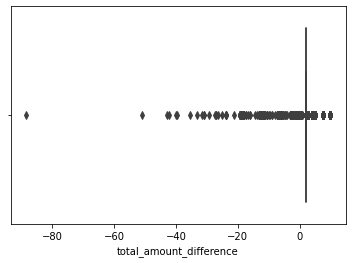

In [197]:
sns.boxplot(total_amount_no_match['total_amount_difference'])

$0.50 MTA tax that is automatically triggered based on the metered rate in use

In [89]:
taxi_trips['mta_tax'].value_counts()

0.50     27250099
0.00      1075875
3.55           42
0.08            7
0.60            7
0.11            6
0.55            5
0.07            5
0.25            5
0.09            2
0.12            1
17.33           1
0.13            1
0.36            1
1.37            1
0.10            1
0.65            1
1.00            1
82.91           1
4.41            1
0.81            1
2.75            1
26.22           1
0.32            1
0.18            1
3.80            1
1.50            1
0.83            1
Name: mta_tax, dtype: int64

In [91]:
20.50+0.50+0.60

21.6

In [95]:
taxi_trips.loc[taxi_trips['mta_tax']==3.55]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Vendor,Ratecode,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone
21164280,1,2019-04-29 18:25:53,2019-04-29 18:25:55,N,1,230,230,1,8.2,30.0,3.75,3.55,0.00,0.00,0.0,37.30,Cash,Street-hail,2.75,"Creative Mobile Technologies, LLC",Standard rate,Manhattan,Times Sq/Theatre District,Yellow Zone,Manhattan,Times Sq/Theatre District,Yellow Zone
21164282,1,2019-05-19 19:29:21,2019-05-19 19:29:23,N,1,162,162,1,5.6,21.0,2.75,3.55,0.00,0.00,0.0,27.30,No charge,Street-hail,2.75,"Creative Mobile Technologies, LLC",Standard rate,Manhattan,Midtown East,Yellow Zone,Manhattan,Midtown East,Yellow Zone
21164284,1,2019-05-21 00:09:20,2019-05-21 00:09:23,N,1,107,107,1,8.5,36.5,3.25,3.55,0.00,0.00,0.0,43.30,Cash,Street-hail,2.75,"Creative Mobile Technologies, LLC",Standard rate,Manhattan,Gramercy,Yellow Zone,Manhattan,Gramercy,Yellow Zone
21164285,1,2019-05-25 16:32:38,2019-05-25 16:32:43,N,1,186,186,1,7.0,28.0,2.75,3.55,0.00,0.00,0.0,34.30,No charge,Street-hail,2.75,"Creative Mobile Technologies, LLC",Standard rate,Manhattan,Penn Station/Madison Sq West,Yellow Zone,Manhattan,Penn Station/Madison Sq West,Yellow Zone
21164286,1,2019-05-25 16:34:14,2019-05-25 16:34:20,N,1,186,186,1,7.1,28.5,2.75,3.55,0.00,0.00,0.0,34.80,No charge,Street-hail,2.75,"Creative Mobile Technologies, LLC",Standard rate,Manhattan,Penn Station/Madison Sq West,Yellow Zone,Manhattan,Penn Station/Madison Sq West,Yellow Zone
21164287,1,2019-05-25 18:12:20,2019-05-25 18:12:26,N,1,144,144,1,3.2,15.0,2.75,3.55,0.00,0.00,0.0,21.30,No charge,Street-hail,2.75,"Creative Mobile Technologies, LLC",Standard rate,Manhattan,Little Italy/NoLiTa,Yellow Zone,Manhattan,Little Italy/NoLiTa,Yellow Zone
21164288,1,2019-05-25 18:59:49,2019-05-25 18:59:53,N,1,161,161,1,6.4,21.5,2.75,3.55,0.00,0.00,0.0,27.80,No charge,Street-hail,2.75,"Creative Mobile Technologies, LLC",Standard rate,Manhattan,Midtown Center,Yellow Zone,Manhattan,Midtown Center,Yellow Zone
21164289,1,2019-05-27 17:26:56,2019-05-27 17:26:59,N,1,232,232,1,3.9,13.5,2.75,3.55,0.00,0.00,0.0,19.80,No charge,Street-hail,2.75,"Creative Mobile Technologies, LLC",Standard rate,Manhattan,Two Bridges/Seward Park,Yellow Zone,Manhattan,Two Bridges/Seward Park,Yellow Zone
21164290,1,2019-06-11 19:25:24,2019-06-11 19:25:30,N,1,261,261,1,2.2,9.5,3.75,3.55,0.00,0.00,0.0,16.80,No charge,Street-hail,2.75,"Creative Mobile Technologies, LLC",Standard rate,Manhattan,World Trade Center,Yellow Zone,Manhattan,World Trade Center,Yellow Zone
22092463,1,2019-11-10 15:51:03,2019-11-10 15:51:06,Y,1,209,209,1,2.1,9.5,2.75,3.55,0.00,0.00,0.0,15.80,Cash,Street-hail,2.75,"Creative Mobile Technologies, LLC",Standard rate,Manhattan,Seaport,Yellow Zone,Manhattan,Seaport,Yellow Zone


In [107]:
30.0+3.75+3.55

37.3

In [94]:
100-28.9

71.1

---

# To-Do

- Update zeros in trip_distance
- Update zeros in fare_amount

###### What methods can be used to fill the missing fare_amount?

After looking at some sample records, it seems like total_amount is the sum of fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, and congestion_surcharge. Therefore, to get the fare_amount where the total_amount is not zero, the following formula can be used:
 - fare_amount = total_amount - improvement_surcharge - tolls_amount - tip_amount - mta_tax - extra - congestion_surcharge

How many records are there that confirms the above formula? And how many zeros can we update using the above formula?

Another way we can update the zeros in fare_amount is to use the actual formula used by the company. According to the data dictionary, the fare_amount is the time-and-distance fare calculated by the meter. To utilise this formula, two variables, time and distance, are needed.

In [ ]:
rows_where_formula_correct = taxi_trips.loc[(taxi_trips['fare_amount'] == taxi_trips['total_amount']-taxi_trips['extra']-taxi_trips['mta_tax']-taxi_trips['tip_amount']-taxi_trips['tolls_amount']-taxi_trips['improvement_surcharge']-taxi_trips['congestion_surcharge']) & (taxi_trips['fare_amount']>0) & (taxi_trips['total_amount']>0)].shape[0]
rows_where_formula_incorrect = taxi_trips.loc[~(taxi_trips['fare_amount'] == taxi_trips['total_amount']-taxi_trips['extra']-taxi_trips['mta_tax']-taxi_trips['tip_amount']-taxi_trips['tolls_amount']-taxi_trips['improvement_surcharge']-taxi_trips['congestion_surcharge']) & (taxi_trips['fare_amount']>0) & (taxi_trips['total_amount']>0)].shape[0]
fare_amount_update_possible = taxi_trips.loc[(taxi_trips['fare_amount']==0) & (taxi_trips['total_amount']>0)].shape[0]
fare_amount_update_not_possible = fare_amount_zero - fare_amount_update_possible

print('There are {} records that confirms the fare_amount formula is correct'.format(rows_where_formula_correct))
print('There are {} records that doesn\'t follow the fare_amount formula'.format(rows_where_formula_incorrect))
print('Using the fare_amount formula, {} records can be updated out of {} which leaves us with {} zeros'.format(fare_amount_update_possible, fare_amount_zero, fare_amount_update_not_possible))

---

### fare_amount is the time-and-distance fare calculated by the meter. How is it calculated?

In [ ]:
taxi_trips.loc[taxi_trips['fare_amount']>0, 'fare_amount'].describe()

In [ ]:
taxi_trips['trip_duration_mins'] = (taxi_trips['lpep_dropoff_datetime'] - taxi_trips['lpep_pickup_datetime']) / np.timedelta64(1, 'm')

taxi_trips['trip_duration_mins']

In [ ]:
taxi_trips.loc[taxi_trips['trip_distance']==1.0,['Ratecode','PU_Zone','DO_Zone','trip_distance','trip_duration_mins','fare_amount']].max()

In [ ]:
taxi_trips.info()

In [ ]:
taxi_trips['lpep_pickup_datetime'].dt.month_name()

In [ ]:
taxi_trips['lpep_pickup_datetime'].dt.month

In [ ]:
taxi_trips['lpep_pickup_datetime'].dt.year

In [ ]:
df[(df['date']>datetime.date(2019,11,1)) & (df['date']<datetime.date(2019,12,1))]  

In [ ]:
import datetime

In [ ]:
taxi_trips.loc[(taxi_trips['lpep_pickup_datetime'].dt.date>datetime.date(2019,11,1)) & (taxi_trips['lpep_pickup_datetime'].dt.date<datetime.date(2019,12,1)),['Ratecode','lpep_pickup_datetime','lpep_dropoff_datetime','trip_distance','trip_duration_mins','fare_amount']].head(30)

In [ ]:
taxi_trips.loc[(taxi_trips['lpep_pickup_datetime']>'2019-11-20 16:02:00') & (taxi_trips['lpep_pickup_datetime']<'2019-11-20 16:05:00'),['Ratecode','lpep_pickup_datetime','lpep_dropoff_datetime','trip_distance','trip_duration_mins','fare_amount']]

In [ ]:
# negative_trip_distance_pivot = 
pd.pivot_table(taxi_trips.loc[taxi_trips['trip_distance']<0], index='DO_Zone', columns='PU_Zone', values='trip_distance', aggfunc='min', fill_value=0, margins=True, margins_name='Total').head(10)
# .sort_values(by='Total', ascending=False).drop('Total')

# Dropping the total row
# negative_trip_distance_pivot.drop('Total', inplace=True)

# negative_trip_distance_pivot

In [ ]:
pd.pivot_table(taxi_trips, index='DO_Zone', columns='PU_Zone', values='trip_distance', aggfunc='max', fill_value=0, margins=True, margins_name='Total').head(10)

In [ ]:
taxi_trips.loc[(taxi_trips['trip_distance']<0) & (taxi_trips['DO_Zone']=='Astoria') & (taxi_trips['PU_Zone']=='Astoria')].shape

In [ ]:
print(taxi_trips.loc[taxi_trips['trip_distance']<0, 'DO_Zone'].value_counts())
print(taxi_trips.loc[taxi_trips['trip_distance']<0, 'PU_Zone'].value_counts())

In [ ]:
taxi_trips.loc[taxi_trips['trip_distance']<0]

In [ ]:
sns.boxplot(taxi_trips['trip_distance'])

In [ ]:
taxi_trips['trip_distance'].value_counts().plot(kind='barh')

In [ ]:
taxi_trips['trip_distance'].plot()

In [ ]:
taxi_trips.loc[taxi_trips['passenger_count']==0]